Import Libraries    

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

#check matplolib styles

In [4]:
from scipy import stats
from datetime import datetime

from sklearn import model_selection


In [5]:
from sklearn import preprocessing

In [32]:
## Carga de Datos

df_daily_calendar = pd.read_csv('../data_dsmarket/daily_calendar_with_events.csv')
df_items = pd.read_csv('../data_dsmarket/item_prices.csv')
df_sales = pd.read_csv('../data_dsmarket/item_sales.csv')

Daily Calendar

In [33]:
df_daily_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1913 non-null   object
 1   weekday      1913 non-null   object
 2   weekday_int  1913 non-null   int64 
 3   d            1913 non-null   object
 4   event        26 non-null     object
dtypes: int64(1), object(4)
memory usage: 74.9+ KB


In [83]:
df_daily_calendar.shape

(1913, 5)

In [34]:
df_daily_calendar.head()

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN


In [35]:
df_daily_calendar.tail()

,date,weekday,weekday_int,d,event
1908,2016-04-20,Wednesday,5,d_1909,NaN
1909,2016-04-21,Thursday,6,d_1910,NaN
1910,2016-04-22,Friday,7,d_1911,NaN
1911,2016-04-23,Saturday,1,d_1912,NaN
1912,2016-04-24,Sunday,2,d_1913,NaN


In [36]:
df_daily_calendar['event'].value_counts(dropna= False)

NaN               1887
SuperBowl            6
Ramadan starts       5
Thanksgiving         5
NewYear              5
Easter               5
Name: event, dtype: int64

In [37]:
###LLenamos los NaN con 'No evento'
df_daily_calendar['event'].fillna('No Evento').value_counts(dropna= False)


No Evento         1887
SuperBowl            6
Ramadan starts       5
Thanksgiving         5
NewYear              5
Easter               5
Name: event, dtype: int64

In [38]:
df_daily_calendar['event'].fillna('No Evento', inplace=True)

In [64]:
df_daily_calendar['date']= pd.to_datetime(df_daily_calendar['date'], format ='%Y-%m-%d')

In [65]:
df_daily_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1913 non-null   datetime64[ns]
 1   weekday      1913 non-null   object        
 2   weekday_int  1913 non-null   int64         
 3   d            1913 non-null   object        
 4   event        1913 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 74.9+ KB


In [66]:
df_daily_calendar.head()

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,No Evento
1,2011-01-30,Sunday,2,d_2,No Evento
2,2011-01-31,Monday,3,d_3,No Evento
3,2011-02-01,Tuesday,4,d_4,No Evento
4,2011-02-02,Wednesday,5,d_5,No Evento


In [79]:
df_daily_calendar.tail()

,date,weekday,weekday_int,d,event
1908,2016-04-20,Wednesday,5,d_1909,No Evento
1909,2016-04-21,Thursday,6,d_1910,No Evento
1910,2016-04-22,Friday,7,d_1911,No Evento
1911,2016-04-23,Saturday,1,d_1912,No Evento
1912,2016-04-24,Sunday,2,d_1913,No Evento


In [81]:
df_daily_calendar['weekday']=df_daily_calendar['date'].dt.day_name()

In [82]:
df_daily_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1913 non-null   datetime64[ns]
 1   weekday      1913 non-null   object        
 2   weekday_int  1913 non-null   int64         
 3   d            1913 non-null   object        
 4   event        1913 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 74.9+ KB


In [129]:
df_daily_calendar.head()

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,No Evento
1,2011-01-30,Sunday,2,d_2,No Evento
2,2011-01-31,Monday,3,d_3,No Evento
3,2011-02-01,Tuesday,4,d_4,No Evento
4,2011-02-02,Wednesday,5,d_5,No Evento


In [131]:
df_daily_calendar.tail()

,date,weekday,weekday_int,d,event
1908,2016-04-20,Wednesday,5,d_1909,No Evento
1909,2016-04-21,Thursday,6,d_1910,No Evento
1910,2016-04-22,Friday,7,d_1911,No Evento
1911,2016-04-23,Saturday,1,d_1912,No Evento
1912,2016-04-24,Sunday,2,d_1913,No Evento


In [132]:
df_daily_calendar['weekday_int'].value_counts()

1    274
2    274
3    273
4    273
5    273
6    273
7    273
Name: weekday_int, dtype: int64

In [85]:
### Items Prices

df_items.head()

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331.0,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332.0,10.9858


In [130]:
df_sales.head()

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [86]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965706 entries, 0 to 6965705
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    float64
 4   sell_price  float64
dtypes: float64(2), object(3)
memory usage: 265.7+ MB


In [95]:
df_items['yearweek'].value_counts(dropna= False)

NaN         243920
201609.0     30490
201616.0     30490
201615.0     30490
201614.0     30490
             ...  
201109.0     13033
201108.0     12799
201107.0     12519
201106.0     11975
201105.0     10932
Name: yearweek, Length: 280, dtype: int64

<AxesSubplot:>

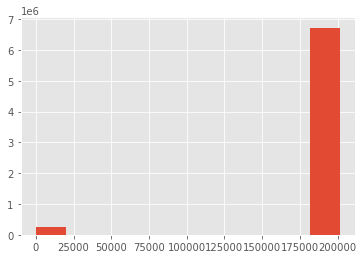

In [123]:
df_items['yearweek'].hist()

In [100]:
df_items['yearweek'].describe()

count    6.721786e+06
mean     2.013824e+05
std      1.450189e+02
min      2.011050e+05
25%      2.012480e+05
50%      2.014100e+05
75%      2.015150e+05
max      2.016170e+05
Name: yearweek, dtype: float64

In [101]:
### Llenamos con (-1) valor extremo en yearweek == no hubo ventas
df_items['yearweek'].fillna(-1, inplace=True)


In [103]:
df_items['yearweek'].isnull().sum()

0

In [107]:
df_items['store_code'].value_counts()

BOS_2    713960
BOS_1    712527
NYC_1    711073
PHI_3    708747
NYC_3    706585
BOS_3    703682
NYC_4    691375
PHI_2    690546
PHI_1    678209
NYC_2    649002
Name: store_code, dtype: int64

In [111]:
df_items.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
yearweek,6965706.0,194330.521036,37019.270944,-1.000,201240.0000,201406.0,201513.000,201617.00
sell_price,6965706.0,5.518273,4.387861,0.012,2.6201,4.2,7.176,134.15


In [112]:
df_items.describe(exclude=np.number).T

,count,unique,top,freq
item,6965706,3049,SUPERMARKET_3_587,2870
category,6965706,3,SUPERMARKET,3239821
store_code,6965706,10,BOS_2,713960


In [117]:
df_items['item'].isnull().sum()

0

In [122]:
df_items['item'].value_counts()

SUPERMARKET_3_587      2870
HOME_&_GARDEN_1_177    2870
HOME_&_GARDEN_2_283    2870
ACCESORIES_1_337       2870
SUPERMARKET_1_032      2870
                       ... 
HOME_&_GARDEN_1_308     652
HOME_&_GARDEN_1_159     633
HOME_&_GARDEN_1_242     610
SUPERMARKET_3_296       602
SUPERMARKET_2_379       543
Name: item, Length: 3049, dtype: int64

In [128]:
df_sales.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Data columns (total 1920 columns):
 #     Column      Dtype 
---    ------      ----- 
 0     id          object
 1     item        object
 2     category    object
 3     department  object
 4     store       object
 5     store_code  object
 6     region      object
 7     d_1         int64 
 8     d_2         int64 
 9     d_3         int64 
 10    d_4         int64 
 11    d_5         int64 
 12    d_6         int64 
 13    d_7         int64 
 14    d_8         int64 
 15    d_9         int64 
 16    d_10        int64 
 17    d_11        int64 
 18    d_12        int64 
 19    d_13        int64 
 20    d_14        int64 
 21    d_15        int64 
 22    d_16        int64 
 23    d_17        int64 
 24    d_18        int64 
 25    d_19        int64 
 26    d_20        int64 
 27    d_21        int64 
 28    d_22        int64 
 29    d_23        int64 
 30    d_24        int64 
 31    d_25        int64 
 32  

In [133]:
df_sales.T

,0,1,2,3,4,5,6,7,8,9,...,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
id,ACCESORIES_1_001_NYC_1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_003_NYC_1,ACCESORIES_1_004_NYC_1,ACCESORIES_1_005_NYC_1,ACCESORIES_1_006_NYC_1,ACCESORIES_1_007_NYC_1,ACCESORIES_1_008_NYC_1,ACCESORIES_1_009_NYC_1,ACCESORIES_1_010_NYC_1,...,SUPERMARKET_3_818_PHI_3,SUPERMARKET_3_819_PHI_3,SUPERMARKET_3_820_PHI_3,SUPERMARKET_3_821_PHI_3,SUPERMARKET_3_822_PHI_3,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_827_PHI_3
item,ACCESORIES_1_001,ACCESORIES_1_002,ACCESORIES_1_003,ACCESORIES_1_004,ACCESORIES_1_005,ACCESORIES_1_006,ACCESORIES_1_007,ACCESORIES_1_008,ACCESORIES_1_009,ACCESORIES_1_010,...,SUPERMARKET_3_818,SUPERMARKET_3_819,SUPERMARKET_3_820,SUPERMARKET_3_821,SUPERMARKET_3_822,SUPERMARKET_3_823,SUPERMARKET_3_824,SUPERMARKET_3_825,SUPERMARKET_3_826,SUPERMARKET_3_827
category,ACCESORIES,ACCESORIES,ACCESORIES,ACCESORIES,ACCESORIES,ACCESORIES,ACCESORIES,ACCESORIES,ACCESORIES,ACCESORIES,...,SUPERMARKET,SUPERMARKET,SUPERMARKET,SUPERMARKET,SUPERMARKET,SUPERMARKET,SUPERMARKET,SUPERMARKET,SUPERMARKET,SUPERMARKET
department,ACCESORIES_1,ACCESORIES_1,ACCESORIES_1,ACCESORIES_1,ACCESORIES_1,ACCESORIES_1,ACCESORIES_1,ACCESORIES_1,ACCESORIES_1,ACCESORIES_1,...,SUPERMARKET_3,SUPERMARKET_3,SUPERMARKET_3,SUPERMARKET_3,SUPERMARKET_3,SUPERMARKET_3,SUPERMARKET_3,SUPERMARKET_3,SUPERMARKET_3,SUPERMARKET_3
store,Greenwich_Village,Greenwich_Village,Greenwich_Village,Greenwich_Village,Greenwich_Village,Greenwich_Village,Greenwich_Village,Greenwich_Village,Greenwich_Village,Greenwich_Village,...,Queen_Village,Queen_Village,Queen_Village,Queen_Village,Queen_Village,Queen_Village,Queen_Village,Queen_Village,Queen_Village,Queen_Village
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1909,1,1,1,0,1,0,1,4,0,0,...,4,1,1,0,0,0,0,1,1,0
d_1910,3,0,0,1,2,0,0,6,0,0,...,2,3,3,0,2,1,0,0,0,0
d_1911,0,0,1,3,2,2,0,3,0,2,...,0,1,6,0,3,0,0,0,3,0
d_1912,1,0,1,7,2,0,1,2,0,0,...,3,0,0,4,2,0,1,1,1,0


In [136]:
df_sales.head(20)

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4
5,ACCESORIES_1_006_NYC_1,ACCESORIES_1_006,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,1,0,1,0,0,0,2,0,0
6,ACCESORIES_1_007_NYC_1,ACCESORIES_1_007,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,1,0,1,0,0,1,1
7,ACCESORIES_1_008_NYC_1,ACCESORIES_1_008,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,12,15,0,...,0,0,1,37,3,4,6,3,2,1
8,ACCESORIES_1_009_NYC_1,ACCESORIES_1_009,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,2,0,7,...,0,0,1,1,6,0,0,0,0,0
9,ACCESORIES_1_010_NYC_1,ACCESORIES_1_010,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,1,...,1,0,0,0,0,0,0,2,0,2


In [138]:
columnas_fechas=df_sales.columns[7:]

df_sales_trans= df_sales.melt(id_vars=['id','item','category','department', 'store','store_code','region'],
                         value_vars=columnas_fechas, var_name='d', value_name='quantity')

df_sales_trans


,id,item,category,department,store,store_code,region,d,quantity
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
...,...,...,...,...,...,...,...,...,...
58327365,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,1
58327366,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,0
58327367,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,0
58327368,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,d_1913,3


In [137]:
df_daily_calendar.head()

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,No Evento
1,2011-01-30,Sunday,2,d_2,No Evento
2,2011-01-31,Monday,3,d_3,No Evento
3,2011-02-01,Tuesday,4,d_4,No Evento
4,2011-02-02,Wednesday,5,d_5,No Evento


In [141]:
df_daily_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1913 non-null   datetime64[ns]
 1   weekday      1913 non-null   object        
 2   weekday_int  1913 non-null   int64         
 3   d            1913 non-null   object        
 4   event        1913 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 74.9+ KB


In [140]:
df_sales_trans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58327370 entries, 0 to 58327369
Data columns (total 9 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   id          object
 1   item        object
 2   category    object
 3   department  object
 4   store       object
 5   store_code  object
 6   region      object
 7   d           object
 8   quantity    int64 
dtypes: int64(1), object(8)
memory usage: 3.9+ GB


In [135]:
df_sales_trans.head(20)

,id,item,category,department,store,store_code,region,date_id,quantity
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
5,ACCESORIES_1_006_NYC_1,ACCESORIES_1_006,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
6,ACCESORIES_1_007_NYC_1,ACCESORIES_1_007,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0
7,ACCESORIES_1_008_NYC_1,ACCESORIES_1_008,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,12
8,ACCESORIES_1_009_NYC_1,ACCESORIES_1_009,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,2
9,ACCESORIES_1_010_NYC_1,ACCESORIES_1_010,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0


In [142]:
data = pd.merge(df_sales_trans,df_daily_calendar,on='d', how ='inner' )



In [155]:
df_items.head()

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332,10.9858


In [153]:
df_items['yearweek']=df_items['yearweek'].astype(int)

In [154]:
df_items['yearweek']=df_items['yearweek'].astype(object)

In [143]:
data.head()

,id,item,category,department,store,store_code,region,d,quantity,date,weekday,weekday_int,event
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,No Evento
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,No Evento
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,No Evento
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,No Evento
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,Saturday,1,No Evento


In [145]:
df_sales_trans.shape

(58327370, 9)

In [146]:
data.shape

(58327370, 13)

In [164]:
(data['date'].dt.year).astype(object)

0           2011
1           2011
2           2011
3           2011
4           2011
            ... 
58327365    2016
58327366    2016
58327367    2016
58327368    2016
58327369    2016
Name: date, Length: 58327370, dtype: object

In [167]:
max((data['date'].dt.isocalendar().week).astype(object))

53

In [169]:
df_items['yearweek'].value_counts()

-1         243920
 201609     30490
 201616     30490
 201615     30490
 201614     30490
            ...  
 201109     13033
 201108     12799
 201107     12519
 201106     11975
 201105     10932
Name: yearweek, Length: 280, dtype: int64